In [6]:
# For general data science and matrix manipulation
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

# For pathway analysis in python
import sspa
import gseapy

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# For network creation and visualisation
import networkx as nx

In [7]:
# Getting my data to look like theirs:
mum_out_file = "/Users/pranathipoojary/Projects/mummichog_proj/untargeted_pa/mummichog/runs/trans_omic_covid_data.run_1_default/tables/userInput_to_EmpiricalCompounds.tsv"
mum_out_map = pd.read_csv(mum_out_file, sep='\t')

print(len(np.unique(mum_out_map['CompoundID_from_user']))) # 275 != no_of_EIDs because multiple metabolite features can map to one EID (218 EIDs)
print(len(mum_out_map))

drop_cols = [col for col in mum_out_map.columns if col not in ["compound_names", "CompoundID_from_user"]]
mum_out_map.drop(columns=drop_cols, inplace=True)
mum_out_map = mum_out_map.rename(columns={'CompoundID_from_user': 'namecustom'})
mum_out_map['annotation'] = [str(row['compound_names']).split(';')[0] for _, row in mum_out_map.iterrows()]
mum_out_map.drop(columns=['compound_names'], inplace=True)
# for i, o in enumerate(mum_out_map['annotation'].tolist()):
#     print(i, o, mum_out_map['namecustom'].iloc[i])




275
291


In [8]:
mum_input_file = "/Users/pranathipoojary/Projects/mummichog_proj/untargeted_pa/data/trans_omic_untargeted/prs_feat_table_pos.csv"
mum_input = pd.read_csv(mum_input_file)
drop_cols = [col for col in mum_input.columns if col[0]!="2" and col not in ["namecustom"]]
mum_input.drop(columns=drop_cols, inplace=True)
# print(len(mum_input))
# print(len(mum_input.columns))
# print(mum_input.head().iloc[:, :5])

df_merged = mum_out_map.merge(mum_input, on='namecustom')
# print(len(df_merged))
# print(df_merged.head().iloc[:, :5])

df_merged = df_merged.drop(columns=['namecustom'])
df_merged = df_merged.rename(columns={df_merged.columns[0]: 'sample_id'})
df_merged = df_merged.set_index('sample_id')
df_merged = df_merged.transpose()

print(len(df_merged), 'samples')
print(len(df_merged.columns), 'compounds')
df_merged.head()

158 samples
291 compounds


sample_id,1-pyrroline,Acrylamide,Aminoacetone$beta-Aminopropion aldehyde,L-Lysine,(R)-Lactaldehyde,Glycine,Sarcosine,D-Lactate$3-Hydroxypropanoate,D-Lactate$3-Hydroxypropanoate,cyanosulfurous acid anion,...,"docosa-4,7,10,13,16-pentaenoyl carnitine$clupanodonyl carnitine",tetracosapentaenoyl carnitine$tetracosapentaenoyl carnitine,Cellulose,Cellulose,Platelet-activating factor,Platelet-activating factor,Diacylglycerol,Sphingomyelin,"O-(4-Hydroxy-3,5-diidophenyl)-3,5-diiodo-L-tyrosine","O-(4-Hydroxy-3,5-diidophenyl)-3,5-diiodo-L-tyrosine"
20P02820001_BEHC18_POS,9.586599e+06,500594.433263,1.650055e+06,1.650055e+06,2.964170e+07,1.736655e+06,4.441695e+07,1.754777e+07,8.942074e+05,3.359977e+06,...,2.846502e+09,1.297294e+09,631601.234551,377840.632907,7.529606e+06,1.000743e+07,3.057846e+06,1.282466e+06,4.106021e+06,666864.255341
20P02820002_BEHC18_POS,7.135026e+06,627499.623865,1.655892e+06,1.655892e+06,4.373973e+07,1.251457e+06,1.123149e+07,1.882648e+07,9.458464e+05,3.149133e+06,...,2.186309e+09,6.906990e+08,467777.238959,282095.649790,5.077834e+06,8.439636e+06,1.601464e+06,1.136240e+06,3.225313e+06,523462.026155
20P02820006_BEHC18_POS,6.042677e+06,607563.660403,3.052753e+06,3.052753e+06,9.800986e+07,1.457548e+06,1.912244e+07,1.881966e+07,7.248538e+05,3.346238e+06,...,1.393014e+09,5.595865e+08,561161.184395,328400.416784,1.738785e+06,3.350195e+06,2.413099e+06,1.058635e+06,2.216370e+06,324092.723047
20P02820016_BEHC18_POS,1.952811e+07,559371.453907,2.664509e+06,2.664509e+06,3.693705e+07,2.758953e+06,5.645569e+07,1.719112e+07,1.130963e+06,3.310986e+06,...,4.079052e+09,1.283862e+09,654914.651013,407136.845586,5.270399e+06,8.844514e+06,2.461041e+06,8.910983e+05,3.795157e+06,645135.095474
20P02820017_BEHC18_POS,1.761037e+07,463999.885733,2.931284e+06,2.931284e+06,4.993484e+07,2.639565e+06,5.328948e+07,2.380405e+07,1.269466e+06,3.374461e+06,...,3.749521e+09,1.749349e+09,744624.691027,453232.219491,8.829612e+06,1.232093e+07,1.974573e+06,1.429257e+06,3.947846e+06,620079.799776


In [9]:
df_meta = pd.read_csv("/Users/pranathipoojary/Projects/mummichog_proj/untargeted_pa/data/trans_omic_untargeted/meta_data.csv")
df_meta = df_meta[['sample_id', 'is_bad', 'age']]
df_meta = df_meta[df_meta['sample_id'].isin(df_merged.index)]
df_meta = df_meta.set_index('sample_id')

print(len(df_meta), 'samples')
df_meta.head()

158 samples


,is_bad,age
sample_id,,
20P02820001_BEHC18_POS,0,38
20P02820002_BEHC18_POS,0,57
20P02820006_BEHC18_POS,1,49
20P02820016_BEHC18_POS,1,24
20P02820017_BEHC18_POS,1,37


In [10]:
print(len(df_merged))
data_filt = df_merged.loc[:, df_merged.isin([' ', np.nan, 0]).mean() < 0.5]
print(len(data_filt))
imputed_mat = data_filt.fillna(data_filt.median())
print(len(imputed_mat))
log2_mat = np.log2(imputed_mat)
print(len(log2_mat))
processed_data = pd.DataFrame(StandardScaler().fit_transform(log2_mat), columns=df_merged.columns, index=df_merged.index)
print(len(processed_data))
processed_data.head()


158
158
158
158
158


sample_id,1-pyrroline,Acrylamide,Aminoacetone$beta-Aminopropion aldehyde,L-Lysine,(R)-Lactaldehyde,Glycine,Sarcosine,D-Lactate$3-Hydroxypropanoate,D-Lactate$3-Hydroxypropanoate,cyanosulfurous acid anion,...,"docosa-4,7,10,13,16-pentaenoyl carnitine$clupanodonyl carnitine",tetracosapentaenoyl carnitine$tetracosapentaenoyl carnitine,Cellulose,Cellulose,Platelet-activating factor,Platelet-activating factor,Diacylglycerol,Sphingomyelin,"O-(4-Hydroxy-3,5-diidophenyl)-3,5-diiodo-L-tyrosine","O-(4-Hydroxy-3,5-diidophenyl)-3,5-diiodo-L-tyrosine"
20P02820001_BEHC18_POS,-0.883662,-0.064219,-0.739133,-0.739133,-1.272601,-0.174995,0.938938,0.494266,-0.558754,0.526820,...,0.587790,0.823294,0.684200,0.644634,1.176439,0.691683,0.775012,0.369420,0.751203,0.808578
20P02820002_BEHC18_POS,-1.782299,0.734335,-0.727592,-0.727592,-0.189532,-1.114603,-3.073310,0.689103,-0.360443,0.316929,...,0.052022,-0.726905,-0.608190,-0.463185,0.282542,0.264042,-0.695277,0.037751,0.223682,0.260681
20P02820006_BEHC18_POS,-2.287887,0.620228,1.271608,1.271608,2.056392,-0.677431,-1.520409,0.688099,-1.300421,0.513549,...,-0.863160,-1.244610,0.175234,0.112994,-2.149162,-2.054807,0.236721,-0.156069,-0.596053,-0.824229
20P02820016_BEHC18_POS,1.281124,0.328145,0.827048,0.827048,-0.660094,1.152435,1.638827,0.437388,0.270936,0.479249,...,1.318266,0.797697,0.840211,0.927731,0.366997,0.381646,0.281441,-0.628069,0.579178,0.733616
20P02820017_BEHC18_POS,0.966618,-0.332512,1.138907,1.138907,0.179204,1.025577,1.470396,1.338926,0.679009,0.540750,...,1.147234,1.558545,1.392758,1.334332,1.537822,1.213648,-0.219192,0.666323,0.665365,0.643979


In [11]:
processed_data.mean().head()

sample_id
1-pyrroline                                1.129898e-15
Acrylamide                                 7.184127e-15
Aminoacetone$beta-Aminopropion aldehyde    4.980545e-15
L-Lysine                                   4.980545e-15
(R)-Lactaldehyde                           1.292918e-15
dtype: float64

In [12]:
PCA_covid = PCA(n_components=2)
PCA_scores = pd.DataFrame(PCA_covid.fit_transform(processed_data), columns=['PC1', 'PC2'], index=df_merged.index)
PCA_scores['is_bad'] = df_meta['is_bad'].values
PCA_scores['age'] = df_meta['age'].values

In [13]:
PCA_scores.head(5)

,PC1,PC2,is_bad,age
20P02820001_BEHC18_POS,-1.522116,0.464831,0,38
20P02820002_BEHC18_POS,-7.120678,-1.331779,0,57
20P02820006_BEHC18_POS,1.478557,9.605894,1,49
20P02820016_BEHC18_POS,8.962580,-0.437170,1,24
20P02820017_BEHC18_POS,11.477293,0.548819,1,37


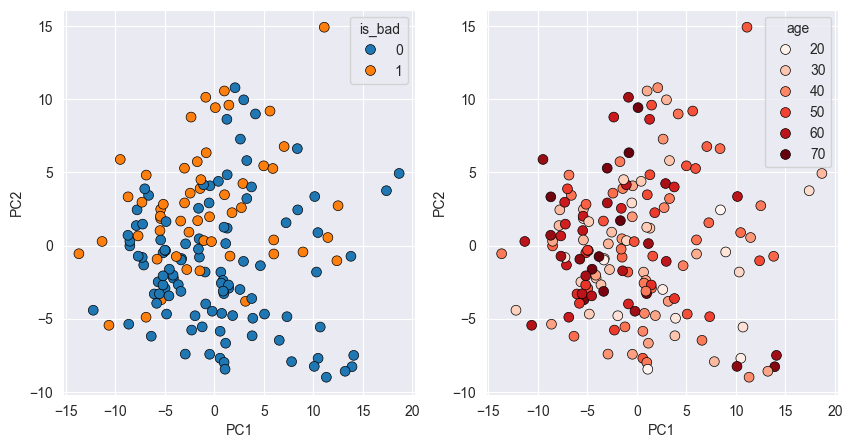

In [14]:
sns.set_style('darkgrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(
    data=PCA_scores,
    x='PC1',
    y='PC2',
    hue='is_bad',
    linewidth=0.5,
    edgecolor='k',
    s=50,
    # palette='Reds',
    # hue_order=['0', '1-2', '3-4', '5-7'],
    ax=ax1
)

sns.scatterplot(
    data=PCA_scores,
    x='PC1',
    y='PC2',
    hue='age',
    linewidth=0.5,
    edgecolor='k',
    s=50,
    palette='Reds',
    hue_order=['0', '1-2', '3-4', '5-7'],
    ax=ax2
)
plt.show()

In [17]:
processed_data.to_csv("transomic_covid_data_processed_rsd04.csv")
compound_names = processed_data.columns.tolist()
df = pd.DataFrame({"Compounds": compound_names})
df.to_csv("Compounds_to_metaboanalyse_rsd04.csv", index=False)

In [18]:
conversion_table = pd.read_csv('/Users/pranathipoojary/Projects/mummichog_proj/untargeted_pa/mummichog/pathway_analysis/name_map_rsd_04.csv')
conversion_table["Comment"].value_counts()
conversion_table.head()

,Query,Match,HMDB,PubChem,ChEBI,KEGG,METLIN,SMILES,Comment
0,1-pyrroline,1-Pyrroline,HMDB0012497,79803.0,19092.0,C15668,NaN,C1CC=NC1,1
1,Acrylamide,Acrylamide,HMDB0004296,6579.0,28619.0,C01659,NaN,NC(=O)C=C,1
2,Aminoacetone$beta-Aminopropion aldehyde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,L-Lysine,Lysine,HMDB0000182,5962.0,18019.0,C00047,5200.0,NCCCC[C@H](N)C(O)=O,1
4,(R)-Lactaldehyde,D-Lactaldehyde,HMDB0006458,439350.0,17167.0,C00937,NaN,C[C@@H](O)C=O,1


In [19]:
processed_data_mapped = sspa.map_identifiers(conversion_table, output_id_type="ChEBI", matrix=processed_data)
# processed_data_mapped.head()

In [20]:
reactome_pathways  = sspa.process_reactome(organism="Homo sapiens")

In [21]:
kegg_human_pathways  = sspa.process_kegg(organism="hsa")

In [22]:
reactome_pathways.head()

,Pathway_name,0,1,2,3,4,5,6,7,8,...,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477
R-HSA-1059683,Interleukin-6 signaling,30616,456216,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109581,Apoptosis,61120,4705,456216,28494,36080,15377,43474,30616,16412,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109582,Hemostasis,15366,91144,15377,15378,15379,456215,456216,35366,37941,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109606,Intrinsic Pathway for Apoptosis,456216,28494,36080,15377,43474,30616,None,None,None,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109703,PKB-mediated events,456216,16618,17489,15377,456215,30616,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [23]:
kegg_human_pathways.head()

,Pathway_name,0,1,2,3,4,5,6,7,8,...,316,317,318,319,320,321,322,323,324,325
hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,C00221,C15972,C01159,C00267,C06188,C06187,C00022,C01451,C00118,...,None,None,None,None,None,None,None,None,None,None
hsa00020,Citrate cycle (TCA cycle) - Homo sapiens (human),C15972,C00026,C00022,C05125,C00024,C16255,C00122,C00417,C00158,...,None,None,None,None,None,None,None,None,None,None
hsa00030,Pentose phosphate pathway - Homo sapiens (human),C03752,C00221,C01801,C00257,C00258,C20589,C00121,C00620,C00022,...,None,None,None,None,None,None,None,None,None,None
hsa00040,Pentose and glucuronate interconversions - Hom...,C20680,C06441,C00508,C04575,C00474,C00714,C00532,C05411,C00026,...,None,None,None,None,None,None,None,None,None,None
hsa00051,Fructose and mannose metabolism - Homo sapiens...,C01721,C00424,C00976,C00096,C00267,C00159,C01099,C11544,C01934,...,None,None,None,None,None,None,None,None,None,None


In [24]:
## if using Reactome database as the pathway database
# count all compounds in the dataset
print(len(compound_names), "compounds in the dataset")

# find how many input compound names in the dataset had a matching ChEBI ID
# chebi_matches = conversion_table[(conversion_table["Comment"] == 1) & (conversion_table["ChEBI"].isnull()==False)]["ChEBI"]
# print(len(chebi_matches), "compounds from the dataset that have ChEBI IDs")

# # count all unique compounds in the Reactome database
# all_reactome_cpds = set(sum(sspa.utils.pathwaydf_to_dict(reactome_pathways).values(), []))
# print(all_reactome_cpds)
# print(len(all_reactome_cpds), "total unique compounds in Reactome")

# # find the intesect between all reactome compounds and all ChEBI IDs annotated to the dataset
# mapped_annotated_cpds = set(processed_data_mapped.columns) & all_reactome_cpds
# print(len(mapped_annotated_cpds), "compounds present in both the dataset and Reactome pathways")

291 compounds in the dataset


In [25]:
print(len(compound_names), "compounds in the dataset")
kegg_matches = conversion_table[(conversion_table["Comment"] == 1) & (conversion_table["KEGG"].isnull()==False)]["KEGG"]
print(len(kegg_matches), "compounds from the dataset that have KEGG IDs")

kegg_human_pathways  = sspa.process_kegg(organism="hsa")
processed_data_mapped = sspa.map_identifiers(conversion_table, output_id_type="KEGG", matrix=processed_data)
all_kegg_cpds = set(sum(sspa.utils.pathwaydf_to_dict(kegg_human_pathways).values(), []))
print(len(all_kegg_cpds))
mapped_annotated_cpds = set(processed_data_mapped.columns) & all_kegg_cpds
print(len(mapped_annotated_cpds), "compounds present in both the dataset and kegg pathways")

291 compounds in the dataset
103 compounds from the dataset that have KEGG IDs
3398
78 compounds present in both the dataset and kegg pathways


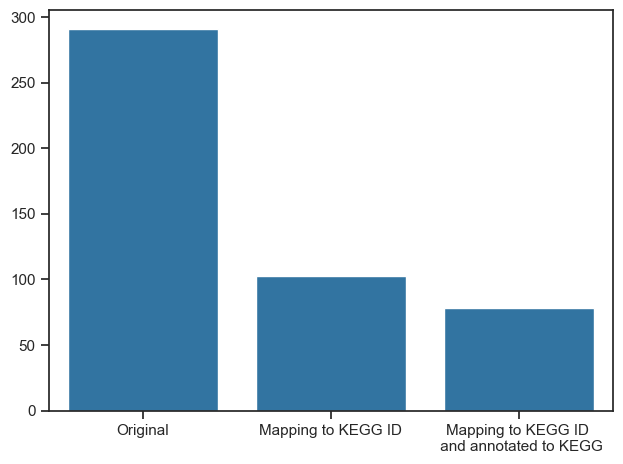

In [26]:
sns.set_context('notebook')
sns.set_style('ticks')
sns.barplot(
    y=[len(compound_names), len(kegg_matches), len(mapped_annotated_cpds)],
    x=['Original', 'Mapping to KEGG ID', 'Mapping to KEGG ID \n and annotated to KEGG']
    )
plt.tight_layout()
plt.show()

In [27]:
data = dict(count=[len(compound_names), len(kegg_matches), len(mapped_annotated_cpds)],
            label=['Original', 'Mapping to KEGG ID', 'Annotated to KEGG pathways'])

fig = px.funnel(data, x='count', y='label')
fig.show(renderer="vscode")

In [ ]:
# import plotly.io as pio
# pio.renderers.default = "notebook"

# df = pd.DataFrame(compound_names, columns=['Original_ID'])
# df["Matched_ID"] = df['Original_ID'].map(dict(zip(conversion_table["Query"], conversion_table["ChEBI"])))
# df["In_pathway"] = [i if i in mapped_annotated_cpds else "NA" for i in df["Matched_ID"] ]
# df = df.replace({"NA":0})
# df[df != 0] = 1
# df = df.astype("float")
# df.index = compound_names

# fig = px.bar(df)
# fig.show(renderer="vscode")

In [28]:
# convert the pathway dataframe to dictionary - for faster calculations
# replace reactome_pathways with the variable containing the pathway dataframe being used
# pathways_dict = sspa.utils.pathwaydf_to_dict(reactome_pathways)
pathways_dict = sspa.utils.pathwaydf_to_dict(kegg_human_pathways)

# How many pathways contain at least two mapped compounds?
pathways_present = {k: v for k, v in pathways_dict.items() if len([i for i in processed_data_mapped.columns if i in v]) > 1}
print(len(pathways_present))

81


In [29]:
# initiate an ORA object
ora = sspa.sspa_ora(
    mat=processed_data_mapped, # Processed data matrix
    metadata=df_meta['is_bad'], # metadata column
    pathways=kegg_human_pathways, # pathway dataframe
    DA_cutoff=0.01, # t-test cutoff to select differential metabolites
    custom_background=None) # None sets to the default background set which are all annotated compounds provided in the input matrix

# perform ORA
ora_res = ora.over_representation_analysis()

In [30]:
print('There are', len(ora.DA_molecules), 'differential metabolites')
print(ora.DA_molecules)

There are 20 differential metabolites
['C16604', 'C00346', 'C05528', 'C00366', 'C00025', 'C00327', 'C03626', 'C03626', 'C00712', 'C00712', 'C14762', 'C00836', 'C00836', 'C16612', 'C11378', 'C00921', 'C04751', 'C00363', 'C11134', 'C01829']


In [31]:
ora.DA_test_res.sort_values(by="P-value")

,Entity,P-value,P-adjust
56,C05528,1.657662e-07,0.000027
108,C00712,4.468468e-07,0.000036
127,C11378,6.977569e-07,0.000037
109,C00712,9.035844e-07,0.000037
133,C04751,3.716077e-06,0.000120
...,...,...,...
6,C00059,9.113209e-01,0.927802
75,C05172,9.123057e-01,0.927802
129,C11378,9.163475e-01,0.927802
50,C00219,9.313089e-01,0.937093


In [32]:
ora_res

,ID,Pathway_name,Hits,Coverage,P-value,P-adjust,DA_Metabolites_ID
0,hsa00140,Steroid hormone biosynthesis - Homo sapiens (h...,1/4,4/99,0.535365,0.610771,C11134
1,hsa00220,Arginine biosynthesis - Homo sapiens (human),2/4,4/23,0.135426,0.610771,"C00025, C00327"
2,hsa00230,Purine metabolism - Homo sapiens (human),2/7,7/95,0.344765,0.610771,"C04751, C00366"
3,hsa00240,Pyrimidine metabolism - Homo sapiens (human),1/2,2/65,0.315399,0.610771,C00363
4,hsa00250,"Alanine, aspartate and glutamate metabolism - ...",1/3,3/28,0.435381,0.610771,C00025
5,hsa00270,Cysteine and methionine metabolism - Homo sapi...,1/5,5/64,0.618510,0.636182,C05528
6,hsa00330,Arginine and proline metabolism - Homo sapiens...,1/5,5/78,0.618510,0.636182,C00025
7,hsa00340,Histidine metabolism - Homo sapiens (human),1/3,3/47,0.435381,0.610771,C00025
8,hsa00350,Tyrosine metabolism - Homo sapiens (human),1/3,3/78,0.435381,0.610771,C01829
9,hsa00430,Taurine and hypotaurine metabolism - Homo sapi...,1/3,3/22,0.435381,0.610771,C00025


In [33]:
ora_res.sort_values(by="P-value")

,ID,Pathway_name,Hits,Coverage,P-value,P-adjust,DA_Metabolites_ID
28,hsa04216,Ferroptosis - Homo sapiens (human),2/3,3/27,0.075436,0.610771,"C00025, C11378"
18,hsa00982,Drug metabolism - cytochrome P450 - Homo sapie...,2/3,3/87,0.075436,0.610771,"C16604, C16612"
1,hsa00220,Arginine biosynthesis - Homo sapiens (human),2/4,4/23,0.135426,0.610771,"C00025, C00327"
25,hsa04071,Sphingolipid signaling pathway - Homo sapiens ...,2/4,4/15,0.135426,0.610771,"C00346, C00836"
23,hsa01240,Biosynthesis of cofactors - Homo sapiens (human),3/9,9/326,0.181993,0.610771,"C00025, C00921, C05528"
13,hsa00600,Sphingolipid metabolism - Homo sapiens (human),2/6,6/25,0.273546,0.610771,"C00346, C00836"
30,hsa04727,GABAergic synapse - Homo sapiens (human),1/2,2/9,0.315399,0.610771,C00025
15,hsa00650,Butanoate metabolism - Homo sapiens (human),1/2,2/42,0.315399,0.610771,C00025
31,hsa04730,Long-term depression - Homo sapiens (human),1/2,2/9,0.315399,0.610771,C00025
10,hsa00471,D-Glutamine and D-glutamate metabolism - Homo ...,1/2,2/13,0.315399,0.610771,C00025


/var/folders/t0/9s1kd78j2w76jjypvc2j3x900000gn/T/ipykernel_18392/1498191650.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




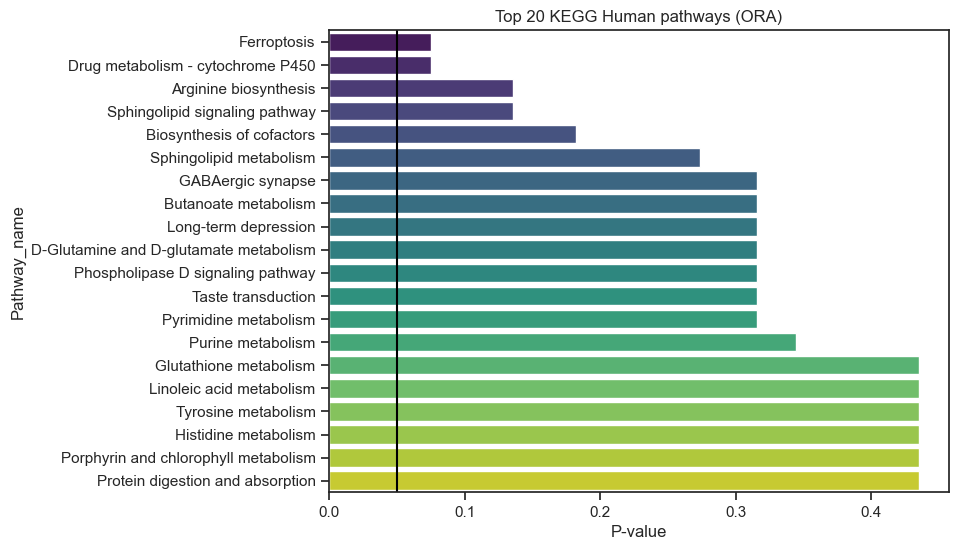

In [35]:
top_20_pathways = ora_res.sort_values(by="P-value").iloc[0:20, :]
top_20_pathways["Pathway_name"] = top_20_pathways["Pathway_name"].str.replace(" - Homo sapiens \\(human\\)", "", regex=True)

plt.figure(figsize=(8, 6))
sns.set_style('ticks')
sns.barplot(
    data=top_20_pathways,
    y="Pathway_name",
    x="P-value",
    orient="h",
    palette="viridis"
    )
plt.axvline(0.05, c="black")
plt.title('Top 20 KEGG Human pathways (ORA)')
# plt.savefig("ORA_top_20.png", dpi=300, bbox_inches="tight")
plt.show()